In [1]:
# Import necessary modules from Qiskit
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import math
%matplotlib inline

In [2]:
# Define QASM simulator and statevector simulator backends
qasm_simulator = Aer.get_backend('qasm_simulator')
statevector_simulator = Aer.get_backend('statevector_simulator')

In [3]:
# Function to run a quantum circuit on both statevector and QASM simulators
def run_on_simulators(circuit):
    # Execute the circuit on the statevector simulator to obtain the statevector
    statevec_job = execute(circuit, backend=statevector_simulator)
    result = statevec_job.result()
    statevec = result.get_statevector()
    
    # Measure the qubits and execute the circuit on the QASM simulator with shots
    num_qubits = circuit.num_qubits
    circuit.measure([i for i in range(num_qubits)],[i for i in range(num_qubits)])
    qasm_job = execute(circuit, backend=qasm_simulator, shots=1024).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts

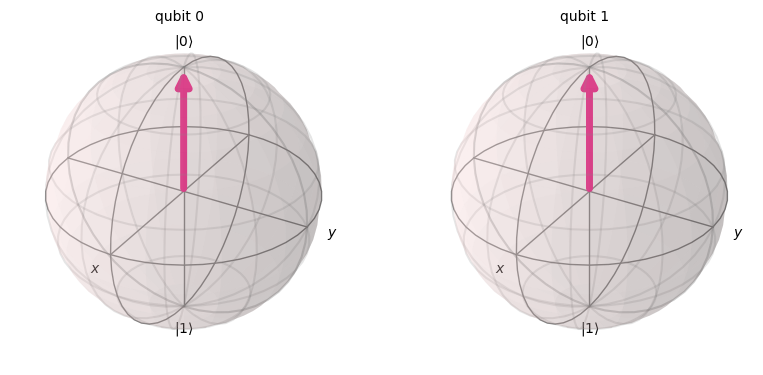

In [4]:
# Create a quantum circuit with 2 qubits and 2 classical bits
circuit = QuantumCircuit(2,2)

# Run the circuit on simulators and plot the Bloch vector for the initial state
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)
# Explanation: The initial state is plotted on the Bloch sphere, showing the qubits in their default |0⟩ state.

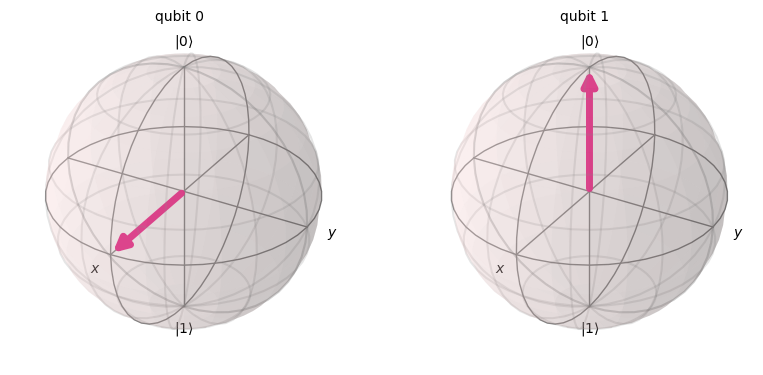

In [5]:
# Apply a Hadamard gate to qubit 0 and run the circuit again
circuit.h(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)
# Explanation: Applying a Hadamard gate to qubit 0 puts it into a superposition, affecting the Bloch vector.

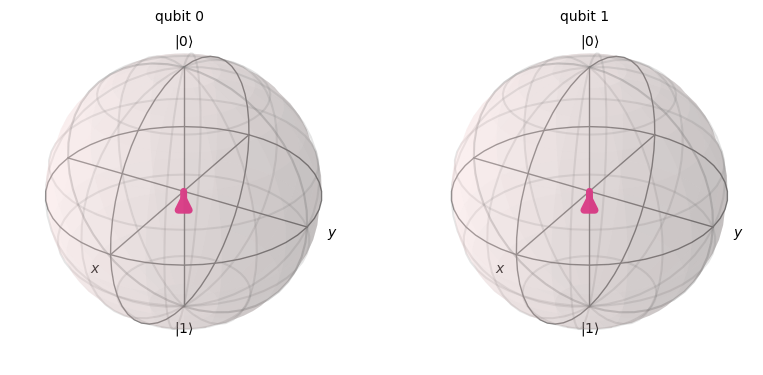

In [6]:
# Create a new quantum circuit with 2 qubits and 2 classical bits, apply Hadamard and CNOT gates
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)
# Explanation: Applying Hadamard and CNOT gates entangles qubits and modifies the Bloch vector accordingly.

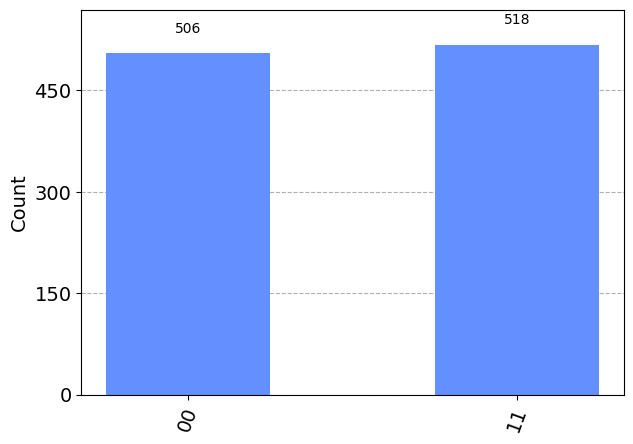

In [7]:
# Plot the histogram of measurement outcomes
plot_histogram([counts])
# Explanation: Display the histogram of measurement outcomes, showing the probability distribution of states.

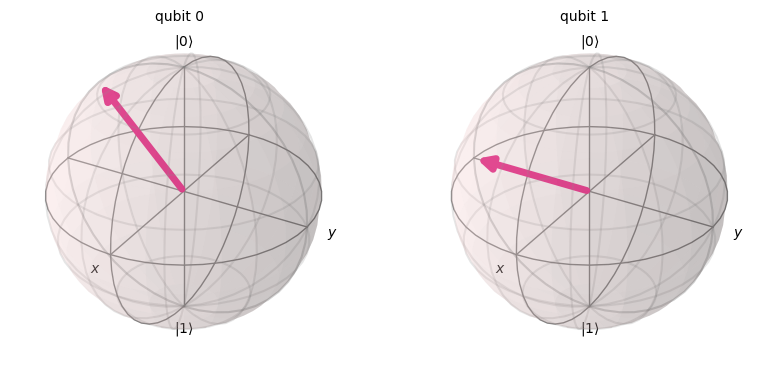

In [10]:
# Create a new quantum circuit with 2 qubits and 2 classical bits, apply Rx gates with phase shifts
circuit = QuantumCircuit(2,2)
circuit.rx(math.pi/4,0)
circuit.rx(math.pi/2,1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)
# Explanation: Applying Rx gates introduces phase shifts, and the Bloch vector reflects these changes.

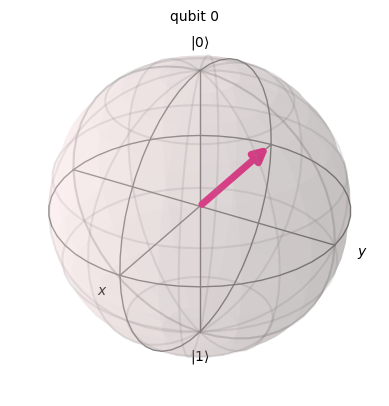

In [9]:
# Create a new quantum circuit with 1 qubit and 1 classical bit, apply Hadamard and Z gates
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.z(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)
# Explanation: Applying Hadamard and Z gates on a single qubit demonstrates their impact on the Bloch vector.

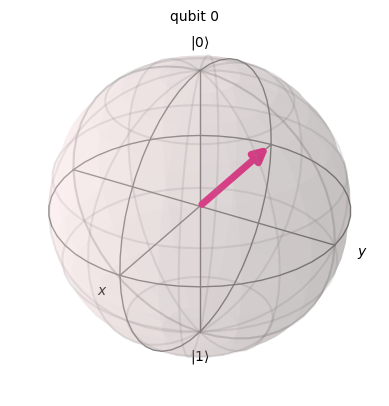

In [22]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.z(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)